In [1]:
# Paso 1: Importar bibliotecas necesarias 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc 
import matplotlib.pyplot as plt
from sklearn. datasets import load_breast_cancer

In [2]:
# Paso 2: Cargar el conjunto de datos de cáncer de mama
data = load_breast_cancer()
X = data.data
y = data. target # Clasificación binaria: maligno (0) o benigno (1)

In [3]:
# Paso 3: Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 4: Entrenar un modelo de regresión logística
model = LogisticRegression()
model. fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [4]:
#-Paso 5: Predecir las probabilidades en el conjunto de prueba
y_scores = model.predict_proba(X_test)[:, 1]

In [5]:
#Paso 6: Calcular la curva ROC y AUC
fpr, tpr, thresholds = roc_curve (y_test, y_scores)
roc_auc = auc (fpr, tpr)

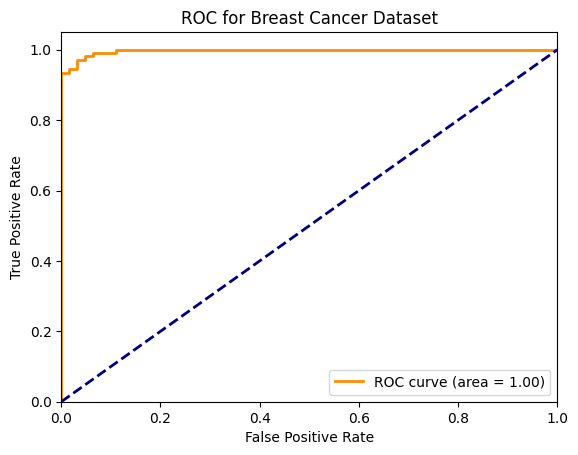

In [6]:
# Paso 7: Visualizar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label= 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Breast Cancer Dataset')
plt.legend (loc="lower right")
plt.show()